<a href="https://colab.research.google.com/github/Lavanya363/icecream-revenue-prediction/blob/main/Revenue_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report , mean_squared_error,r2_score,mean_absolute_error

In [2]:
#importing the dataset
df = pd.read_csv('/content/IceCreamData.csv')

In [3]:
#EDA - explory data analysis
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [6]:
df.columns

Index(['Temperature', 'Revenue'], dtype='object')

In [7]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [8]:
df.shape

(500, 2)

In [9]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


<ipython-input-10-2884c05f1fb1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df,color='green')


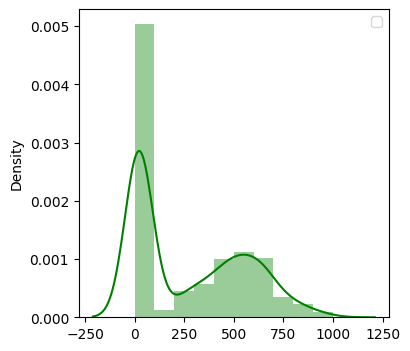

In [10]:
#distplot
plt.figure(figsize=(4,4))
sns.distplot(df,color='green')
plt.legend()

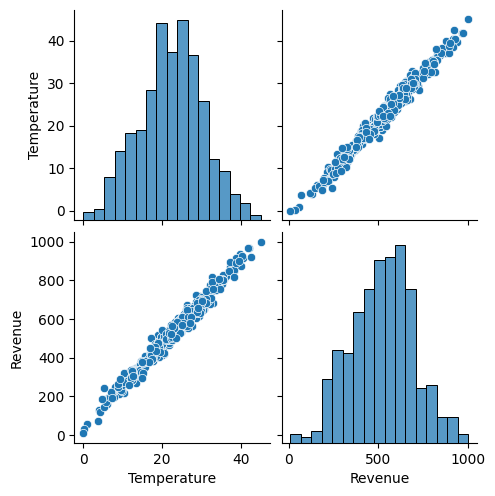

In [11]:
sns.pairplot(df)

<Axes: ylabel='count'>

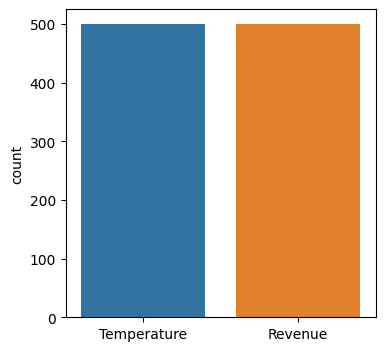

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(df)

In [13]:
#assigning the features
x = np.array(df.Temperature.values)
y = np.array(df.Revenue.values)

In [14]:
#splitting the data
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=23)

In [15]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((400,), (100,), (400,), (100,))

In [16]:
#model selection
model = DecisionTreeRegressor()
model.fit(x_train.reshape(-1,1) , y_train.reshape(-1,1))

DecisionTreeRegressor()

In [17]:
#predicting
y_pred = model.predict(x_test.reshape(-1,1))

In [18]:
y_pred

array([333.3342585 , 654.1974057 , 524.2361154 , 702.6236136 ,
       274.6789209 , 471.7015569 , 586.1387673 , 395.2737497 ,
       524.2361154 , 918.3912316 , 607.8391938 , 749.3671543 ,
       651.8615363 , 679.3177906 , 726.2337713 , 828.2960767 ,
       697.1474728 , 343.3629045 , 612.8037704 , 402.4553204 ,
       827.6848313 , 697.1474728 , 273.0733418 , 440.6778286 ,
       563.3012801 , 564.3105317 , 449.1128688 , 586.150568  ,
       524.2361154 , 501.7329901 , 572.6720474 , 344.6887652 ,
       674.1506442 , 499.4583433 , 798.0597179 , 594.1103517 ,
       828.2960767 , 539.5277397 , 500.0657787 , 704.2814391 ,
       898.805423  , 278.4182651 , 381.0433769 , 335.770416  ,
       458.860905  , 603.3053386 , 545.9039291 , 427.2113597 ,
       625.8046425 , 242.5098553 ,  32.54661902, 524.2361154 ,
       969.2916296 , 755.8183987 , 483.4897686 , 639.5380115 ,
       682.7528689 , 540.798122  , 278.0627594 , 696.6401775 ,
       617.1007232 , 440.6778286 , 390.8791194 , 242.50

<Axes: >

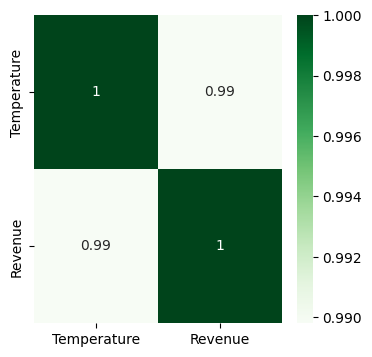

In [19]:
#heatmap
plt.figure(figsize=(4,4))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

In [20]:
#comparison between actual and predicted values
comparison_result = pd.DataFrame({'Actual_values':y_test.reshape(-1),'Predicted_values':y_pred.reshape(-1)})

In [21]:
comparison_result

,Actual_values,Predicted_values
0,337.119025,333.334258
1,644.488633,654.197406
2,518.216105,524.236115
3,684.158444,702.623614
4,235.364643,274.678921
...,...,...
95,520.392405,550.278516
96,530.748225,594.804871
97,599.116360,615.926650
98,553.119651,542.839106


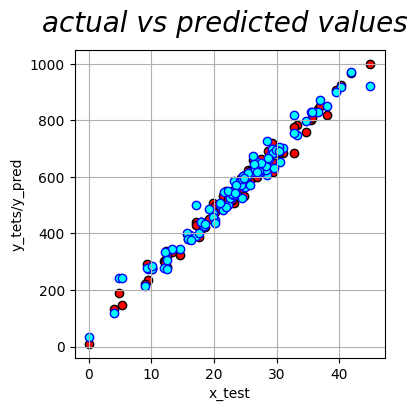

In [22]:
#graph between actual and predicted values
plt.figure(figsize=(4,4))
plt.scatter(x_test,y_test,color='red',edgecolor='black')
plt.scatter(x_test,y_pred,color='cyan',edgecolor='blue')
plt.xlabel('x_test')
plt.ylabel('y_tets/y_pred')
plt.suptitle('actual vs predicted values',fontstyle='oblique',fontsize=20)
plt.grid()
plt.show()

In [23]:
#metrics
#goodness of fitting a model is known as r2_score
r2_score(y_test,y_pred)

0.9683240905477469

In [24]:
mean_squared_error(y_test,y_pred)

1055.7477054883018

In [25]:
mean_absolute_error(y_test,y_pred)

25.6874594142